# importing libraries

In [3]:
import pandas as pd

In [5]:
import numpy as np

# import csv as data frame

In [12]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

# first five row of dataframe

In [15]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


# getting info of data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.7+ KB


# get summary statistics

In [26]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


# get column names

In [29]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

# shape of dataframe

In [34]:
df.shape

(167, 5)

# get categories and count of categorical values

In [37]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [39]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

# get encoding of categorical features

In [44]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}}, inplace=True)

In [46]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}}, inplace=True)

# define y (dependent or label or target variable) and X (independent or features or attribute variable)

In [49]:
y = df['Class']

In [51]:
y.shape

(167,)

In [53]:
y


0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [55]:
X = df[['Motor', 'Screw', 'Pgain' , 'Vgain']]

In [57]:
X = df.drop('Class', axis=1)

In [59]:
X.shape

(167, 4)

In [61]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


# Get train test split

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2529)



In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 4), (34, 4), (133,), (34,))

# get model train

In [71]:
from sklearn.linear_model import LinearRegression

In [73]:
lr = LinearRegression()

In [75]:
lr.fit(X_train , y_train)

LinearRegression()

# get model prediciton

In [78]:
y_pred = lr.predict(X_test)

In [80]:
y_pred.shape

(34,)

In [82]:
y_pred

array([26.0341672 , 31.26527793, 19.54462992, 23.59257913, 40.03338157,
       24.98715011, 12.08334059, 19.69118525, 41.76945096, 42.17580349,
       13.81940998, 25.82275774, 17.80856053, 14.3952204 , 22.35061896,
       20.52679288, -4.69896026, 31.24237538, 32.97844477, -0.3683113 ,
       34.33106417, 32.57209223, 35.23152593, 29.93556108, 18.38437095,
        7.56418471, 29.78900574, 16.62539901, 24.49304089,  4.49839847,
       31.52507513, 24.0637858 , 36.04423101, 31.67163047])

# get model evaluation

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [87]:
mean_squared_error(y_test,y_pred)

56.94860649933516

In [93]:
 mean_absolute_error(y_test,y_pred)

6.374044609081592

In [95]:
r2_score(y_test,y_pred)

0.7059325359329275

# get visualisation of actual vs predicted results

In [98]:
import matplotlib.pyplot as plt

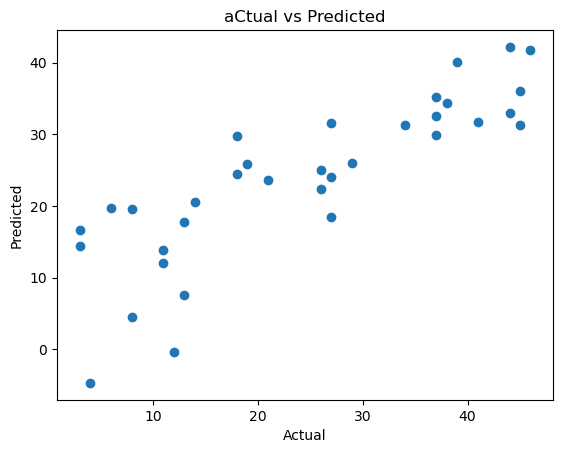

In [100]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("aCtual vs Predicted")
plt.show()

# get future predictions

In [103]:
X_new = df.sample(1)


In [105]:
X_new

,Motor,Screw,Pgain,Vgain,Class
140,4,4,4,2,11


In [107]:
X_new.shape

(1, 5)

In [115]:
X_new = X_new.drop('Class' , axis=1)

In [117]:
 y_pred_new = lr.predict(X_new)  

In [119]:
 y_pred_new

array([10.08747399])